1. Exercise 1:
Load penguins dataset from seaborn, use bill_length_mm and bill_depth_mm to build a SVM model to classify Adelie species and Not Adelie species.

 
2. Exercise 2:
Similar to Exercise 1, but now using bill_length_mm, bill_depth_mm, flipper_length_mm and body_mass_g.

EX 1:

In [370]:
import pandas as pd
import seaborn as sns

sns.set()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from seaborn import load_dataset, pairplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [371]:
df = sns.load_dataset('penguins')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [373]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [374]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [375]:
df=df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [377]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [378]:
df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

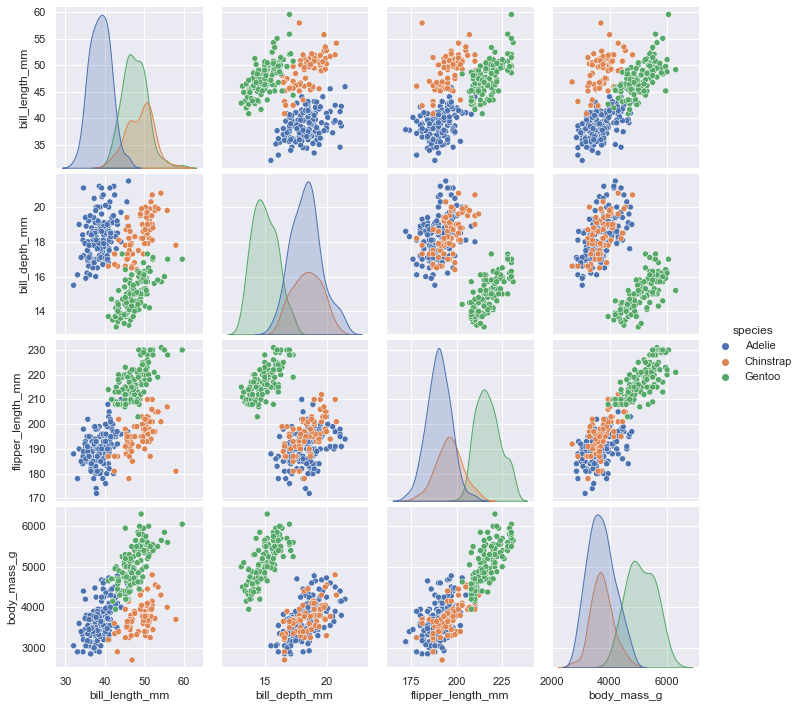

In [379]:
pairplot(df, hue='species')
plt.show()

In [380]:
df['is_adelie'] = df.species.apply(
    lambda x: True if x == 'Adelie' else False)
df 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,False
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,False
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,False
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,False


In [381]:
adelie_df = df[df.is_adelie]
adelie_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True
...,...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female,True
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female,True
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male,True
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female,True


In [382]:
not_adelie_df = df[~df.is_adelie].sample(146, random_state=1)
not_adelie_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_adelie
168,Chinstrap,Dream,50.3,20.0,197.0,3300.0,Male,False
327,Gentoo,Biscoe,53.4,15.8,219.0,5500.0,Male,False
280,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,Female,False
192,Chinstrap,Dream,49.0,19.5,210.0,3950.0,Male,False
259,Gentoo,Biscoe,48.7,15.7,208.0,5350.0,Male,False
...,...,...,...,...,...,...,...,...
178,Chinstrap,Dream,50.5,18.4,200.0,3400.0,Female,False
228,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,Female,False
195,Chinstrap,Dream,45.5,17.0,196.0,3500.0,Female,False
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,Female,False


In [383]:
df = pd.concat([adelie_df, not_adelie_df])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True
...,...,...,...,...,...,...,...,...
178,Chinstrap,Dream,50.5,18.4,200.0,3400.0,Female,False
228,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,Female,False
195,Chinstrap,Dream,45.5,17.0,196.0,3500.0,Female,False
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,Female,False


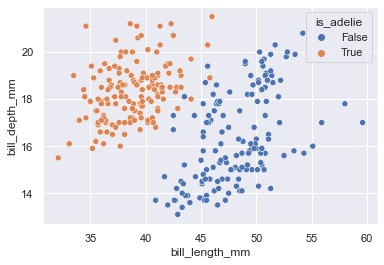

In [384]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='is_adelie')
plt.show()

In [385]:
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_adelie
203,Chinstrap,Dream,51.4,19.0,201.0,3950.0,Male,False
332,Gentoo,Biscoe,43.5,15.2,213.0,4650.0,Female,False
228,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,Female,False
104,Adelie,Biscoe,37.9,18.6,193.0,2925.0,Female,True
36,Adelie,Dream,38.8,20.0,190.0,3950.0,Male,True


In [386]:
df_1 = df.drop(columns=['island', 'flipper_length_mm','body_mass_g','sex'])
df_1

,species,bill_length_mm,bill_depth_mm,is_adelie
0,Adelie,39.1,18.7,True
1,Adelie,39.5,17.4,True
2,Adelie,40.3,18.0,True
4,Adelie,36.7,19.3,True
5,Adelie,39.3,20.6,True
...,...,...,...,...
178,Chinstrap,50.5,18.4,False
228,Gentoo,43.3,13.4,False
195,Chinstrap,45.5,17.0,False
176,Chinstrap,46.7,17.9,False


In [387]:
X = np.array(df_1.iloc[:,1:3])
X.shape

(292, 2)

In [388]:
X[:5]

array([[39.1, 18.7],
       [39.5, 17.4],
       [40.3, 18. ],
       [36.7, 19.3],
       [39.3, 20.6]])

In [389]:
y = np.array(df_1['is_adelie'])
y.shape

(292,)

In [390]:
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [391]:
sklearn_svm = SVC(kernel='linear', C=1e5) # big number to create Hard-margin SVM
sklearn_svm

SVC(C=100000.0, kernel='linear')

In [392]:
sklearn_svm.fit(X, y)

SVC(C=100000.0, kernel='linear')

In [393]:
svm_w = sklearn_svm.coef_
svm_w

array([[-14.55559402,  29.0042913 ]])

In [394]:
svm_b = sklearn_svm.intercept_
svm_b

array([112.52919449])

In [395]:
sklearn_logistic_regression = LogisticRegression()
sklearn_logistic_regression

LogisticRegression()

In [396]:
sklearn_logistic_regression.fit(X, y)

LogisticRegression()

In [397]:
lr_w = sklearn_logistic_regression.coef_
lr_w

array([[-1.41648141,  1.7735921 ]])

In [398]:
lr_b = sklearn_logistic_regression.intercept_
lr_b

array([30.16694843])

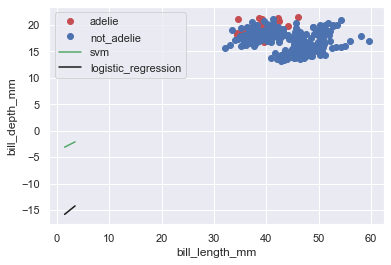

In [399]:
def display(X, y, w_1, b_1, w_2, b_2):
    plt.plot(X[:50, 0], X[:50, 1], 'ro', label='adelie')
    plt.plot(X[50:, 0], X[50:, 1], 'bo', label='not_adelie')
    
    line_types = ['g-', 'k-']
    model_name = ['svm', 'logistic_regression']
    reg_x = np.linspace(1.5, 3.5, 2)
    for idx, (w, b) in enumerate([[w_1, b_1], [w_2, b_2]]):
        
        reg_y = \
        (- b[0] / w[0][1]) + \
        (- w[0][0] / w[0][1]) * reg_x

        plt.plot(reg_x, reg_y, line_types[idx], label=model_name[idx])

    plt.xlabel('bill_length_mm')
    plt.ylabel('bill_depth_mm')
    plt.legend()
    plt.show()
    
display(X, y, svm_w, svm_b, lr_w, lr_b)

#không hiểu tại sao nó không tách?

In [400]:
lr_y_pred = sklearn_logistic_regression.predict(X)
lr_y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [401]:
print(classification_report(lr_y_pred, y))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       146
        True       0.99      0.99      0.99       146

    accuracy                           0.99       292
   macro avg       0.99      0.99      0.99       292
weighted avg       0.99      0.99      0.99       292



In [402]:
svm_y_pred = sklearn_svm.predict(X)
svm_y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [403]:
print(classification_report(svm_y_pred, y))

              precision    recall  f1-score   support

       False       0.99      0.98      0.98       147
        True       0.98      0.99      0.98       145

    accuracy                           0.98       292
   macro avg       0.98      0.98      0.98       292
weighted avg       0.98      0.98      0.98       292



EX 2:

In [404]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,is_adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,True
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,True
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,True
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,True
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,True
...,...,...,...,...,...,...,...,...
178,Chinstrap,Dream,50.5,18.4,200.0,3400.0,Female,False
228,Gentoo,Biscoe,43.3,13.4,209.0,4400.0,Female,False
195,Chinstrap,Dream,45.5,17.0,196.0,3500.0,Female,False
176,Chinstrap,Dream,46.7,17.9,195.0,3300.0,Female,False


In [405]:
df_2 = df.drop(columns=['island','sex'])
df_2

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,is_adelie
0,Adelie,39.1,18.7,181.0,3750.0,True
1,Adelie,39.5,17.4,186.0,3800.0,True
2,Adelie,40.3,18.0,195.0,3250.0,True
4,Adelie,36.7,19.3,193.0,3450.0,True
5,Adelie,39.3,20.6,190.0,3650.0,True
...,...,...,...,...,...,...
178,Chinstrap,50.5,18.4,200.0,3400.0,False
228,Gentoo,43.3,13.4,209.0,4400.0,False
195,Chinstrap,45.5,17.0,196.0,3500.0,False
176,Chinstrap,46.7,17.9,195.0,3300.0,False


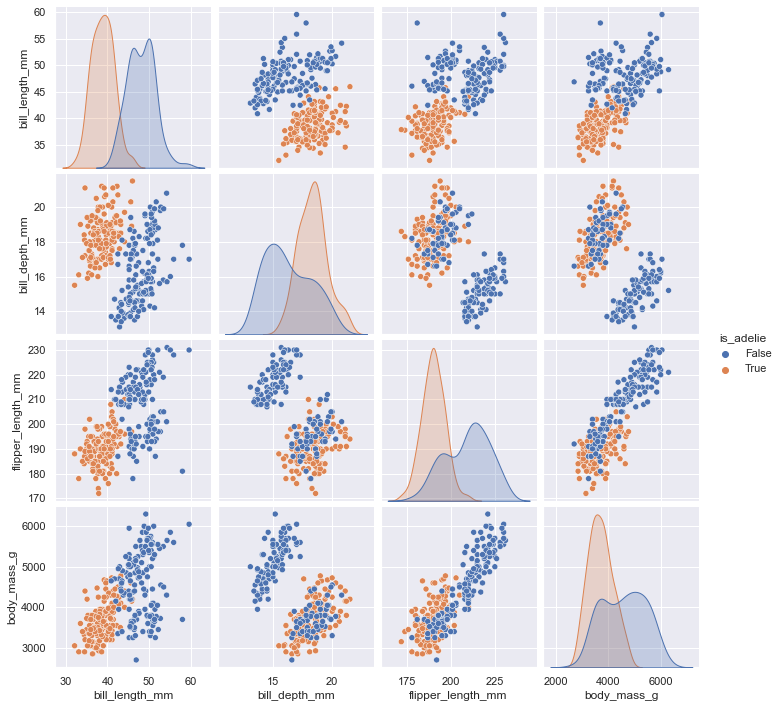

In [406]:
sns.pairplot(df_2, hue='is_adelie')
plt.show()

In [407]:
df_2.sample(5)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,is_adelie
44,Adelie,37.0,16.9,185.0,3000.0,True
297,Gentoo,51.1,16.3,220.0,6000.0,False
77,Adelie,37.2,19.4,184.0,3900.0,True
66,Adelie,35.5,16.2,195.0,3350.0,True
120,Adelie,36.2,17.2,187.0,3150.0,True


In [408]:
X_2 = np.array(df_2.iloc[:,1:5])
X_2.shape

(292, 4)

In [409]:
X_2[:5]

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       [  36.7,   19.3,  193. , 3450. ],
       [  39.3,   20.6,  190. , 3650. ]])

In [410]:
y_2 = np.array(df_2['is_adelie'])
y_2.shape

(292,)

In [411]:
y_2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [412]:
sklearn_svm_2 = SVC(kernel='linear', C=1e5) # big number to create Hard-margin SVM
sklearn_svm_2

SVC(C=100000.0, kernel='linear')

In [413]:
sklearn_svm_2.fit(X_2, y_2)

SVC(C=100000.0, kernel='linear')

In [414]:
svm_w_2 = sklearn_svm_2.coef_
svm_w_2

array([[-81730.37184976, 124387.87681355, -10072.02668612,
           180.31064752]])

In [415]:
svm_b_2 = sklearn_svm_2.intercept_
svm_b_2

array([2606380.80920293])

In [416]:
sklearn_logistic_regression_2 = LogisticRegression()
sklearn_logistic_regression_2

LogisticRegression()

In [417]:
sklearn_logistic_regression_2.fit(X_2, y_2)

LogisticRegression()

In [418]:
lr_w_2 = sklearn_logistic_regression_2.coef_
lr_w_2

array([[-1.34590572e+00,  1.79351097e+00, -7.54255026e-02,
         1.69862235e-03]])

In [419]:
lr_b_2 = sklearn_logistic_regression_2.intercept_
lr_b_2

array([34.98716201])

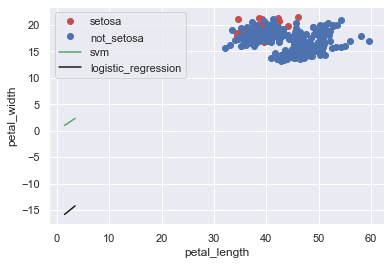

In [420]:
def display(X_2, y_2, w_1, b_1, w_2, b_2):
    plt.plot(X[:50, 0], X[:50, 1], 'ro', label='setosa')
    plt.plot(X[50:, 0], X[50:, 1], 'bo', label='not_setosa')
    
    line_types = ['g-', 'k-']
    model_name = ['svm', 'logistic_regression']
    reg_x = np.linspace(1.5, 3.5, 2)
    for idx, (w, b) in enumerate([[w_1, b_1], [w_2, b_2]]):
        
        reg_y = \
        (- b[0] / w[0][1]) + \
        (- w[0][0] / w[0][1]) * reg_x

        plt.plot(reg_x, reg_y, line_types[idx], label=model_name[idx])

    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend()
    plt.show()

display(X_2, y_2, svm_w_2, svm_b, lr_w, lr_b)

In [421]:
lr_y_pred_2 = sklearn_logistic_regression_2.predict(X_2)
lr_y_pred_2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [422]:
print(classification_report(lr_y_pred_2, y_2))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       147
        True       0.99      0.99      0.99       145

    accuracy                           0.99       292
   macro avg       0.99      0.99      0.99       292
weighted avg       0.99      0.99      0.99       292



In [423]:
svm_y_pred_2 = sklearn_svm_2.predict(X_2)
svm_y_pred_2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,

In [424]:
print(classification_report(svm_y_pred_2, y_2))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       147
        True       0.99      0.99      0.99       145

    accuracy                           0.99       292
   macro avg       0.99      0.99      0.99       292
weighted avg       0.99      0.99      0.99       292

